# Theoretical Answers

1. **What is a Decision Tree, and how does it work?**  
    - A Decision Tree is a supervised machine learning algorithm used for classification and regression. It splits the dataset into subsets based on feature values, creating a tree-like structure of decisions. Each internal node represents a decision (split) on a feature, each branch represents the outcome of the decision, and each leaf node represents a final prediction (class or continuous value).

2. **What are impurity measures in Decision Trees?**  
    - Impurity measures quantify how "mixed" the classes are in a node. Common measures include Gini Impurity and Entropy. Lower impurity indicates a node with samples predominantly from a single class.

3. **What is the mathematical formula for Gini Impurity?**  
    - Gini Impurity for a node is calculated as:  
      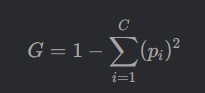
      where ( p_i \) is the probability of class ( i ) in the node, and ( C ) is the number of classes.

4. **What is the mathematical formula for Entropy?**  
    - Entropy for a node is calculated as:  
      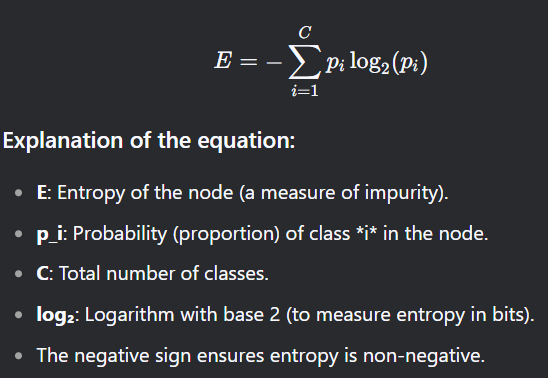

5. **What is Information Gain, and how is it used in Decision Trees?**  
    - Information Gain (IG) measures the reduction in impurity after a split. It is calculated as:  
    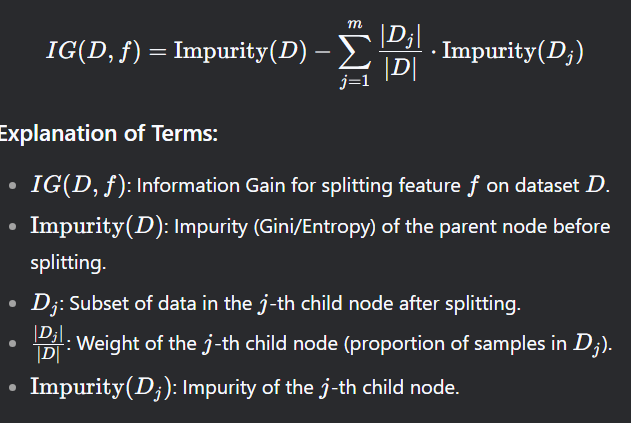
      Features with higher IG are prioritized for splitting.

6. **What is the difference between Gini Impurity and Entropy?**  
    - Gini Impurity is computationally faster as it avoids logarithmic calculations. Entropy tends to produce slightly more balanced splits. Both often yield similar results in practice.

7. **What is the mathematical explanation behind Decision Trees?**  
    - Decision Trees recursively partition the feature space to minimize impurity. At each step, the algorithm selects the feature and threshold that maximize Information Gain (or minimize impurity) until stopping criteria (e.g., max depth) are met.

8. **What is Pre-Pruning in Decision Trees?**  
    - Pre-Pruning involves stopping tree growth early by setting constraints (e.g., max depth, minimum samples per leaf) to prevent overfitting.

9. **What is Post-Pruning in Decision Trees?**  
    - Post-Pruning (or cost-complexity pruning) involves growing the full tree first and then removing branches that provide little predictive power, using validation data to assess performance.

10. **What is the difference between Pre-Pruning and Post-Pruning?**  
    - Pre-Pruning restricts tree growth during training, while Post-Pruning trims the tree after it is fully grown. Post-Pruning is often more effective but computationally heavier.

11. **What is a Decision Tree Regressor?**  
    - A Decision Tree Regressor predicts continuous values by splitting data to minimize variance in child nodes. The prediction at a leaf is the mean of target values in that node.

12. **What are the advantages and disadvantages of Decision Trees?**  
    - **Advantages**: Easy to interpret, handle non-linear relationships, require little data preprocessing.  
    - **Disadvantages**: Prone to overfitting, sensitive to small data changes, biased toward dominant classes.

13. **How does a Decision Tree handle missing values?**  
    - Some implementations (e.g., CART) use surrogate splits to handle missing values by mimicking the original split using other features. Others may ignore missing samples or impute values.

14. **How does a Decision Tree handle categorical features?**  
    - Categorical features are converted via one-hot encoding or ordinal encoding. Algorithms like C4.5 directly handle categorical splits by grouping categories based on impurity reduction.

15. **What are some real-world applications of Decision Trees?**  
    - Applications include medical diagnosis (classification of diseases), customer churn prediction, credit scoring, fraud detection, and recommendation systems.

PRACTICAL QUESTIONS

In [1]:
# 16. Write a Python program to train a Decision Tree Classifier on the iris dataset and print the model accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 1.0000


In [2]:
# 17. Write a Python program to train a Decision Tree Classifier using Gini impurity and print the feature importances.


iris = load_iris()
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(iris.data, iris.target)

for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.4f}")

sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


In [3]:
# 18. Write a Python program to train a Decision Tree Classifier using Entropy and print model accuracy.

X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
print(f"Accuracy: {clf.score(X_test, y_test):.4f}")

Accuracy: 0.9778


In [5]:
# 19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using MSE.
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)
print(f"MSE: {mean_squared_error(y_test, reg.predict(X_test)):.4f}")

MSE: 0.5280


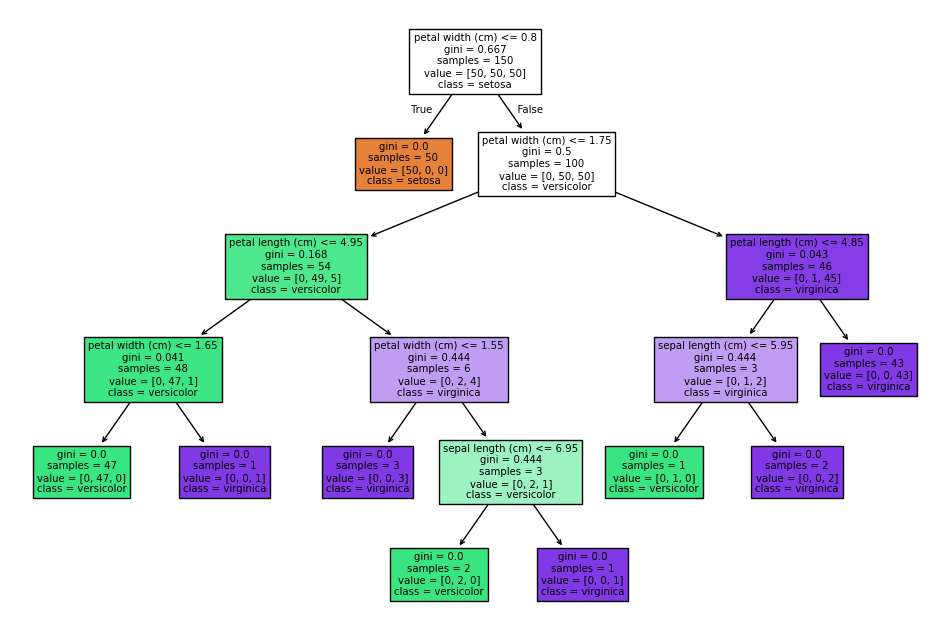

In [8]:
# 20. Write a Python program to train a Decision Tree Classifier and visualize the tree using matplotlib (no Graphviz needed).

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [9]:
# 21. Write a Python program to train a Decision Tree Classifier with max_depth=3 and compare accuracy with a fully grown tree.

X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target, test_size=0.3, random_state=42)

clf3 = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train)
clf_full = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(f"Max_depth=3 Accuracy: {clf3.score(X_test, y_test):.4f}")
print(f"Full Tree Accuracy: {clf_full.score(X_test, y_test):.4f}")

Max_depth=3 Accuracy: 1.0000
Full Tree Accuracy: 1.0000


In [11]:
# 22. Write a Python program to train a Decision Tree Classifier with min_samples_split=5 and compare accuracy with default.

X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target, test_size=0.3, random_state=42)

clf5 = DecisionTreeClassifier(min_samples_split=5, random_state=42).fit(X_train, y_train)
clf_default = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(f"min_samples_split=5 Accuracy: {clf5.score(X_test, y_test):.4f}")
print(f"Default Accuracy: {clf_default.score(X_test, y_test):.4f}")

min_samples_split=5 Accuracy: 1.0000
Default Accuracy: 1.0000


In [13]:
# 23. Write a Python program to apply feature scaling before training and compare accuracy with unscaled data.

from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target, test_size=0.3, random_state=42)

scaler = StandardScaler()
clf_scaled = DecisionTreeClassifier(random_state=42).fit(scaler.fit_transform(X_train), y_train)
clf_unscaled = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(f"Scaled Accuracy: {clf_scaled.score(scaler.transform(X_test), y_test):.4f}")
print(f"Unscaled Accuracy: {clf_unscaled.score(X_test, y_test):.4f}")

Scaled Accuracy: 1.0000
Unscaled Accuracy: 1.0000


In [14]:
# 24. Write a Python program to train using One-vs-Rest (OvR) strategy for multiclass classification.

from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target, test_size=0.3, random_state=42)
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42)).fit(X_train, y_train)
print(f"OvR Accuracy: {clf.score(X_test, y_test):.4f}")

OvR Accuracy: 1.0000


In [15]:
# 25. Write a Python program to train a Decision Tree Classifier and display feature importance scores.


clf = DecisionTreeClassifier().fit(load_iris().data, load_iris().target)
for name, score in zip(load_iris().feature_names, clf.feature_importances_):
    print(f"{name}: {score:.4f}")

sepal length (cm): 0.0267
sepal width (cm): 0.0000
petal length (cm): 0.5507
petal width (cm): 0.4226


In [16]:
# 26. Write a Python program to train Decision Tree Regressor with max_depth=5 and compare with unrestricted tree.
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(fetch_california_housing().data, fetch_california_housing().target, test_size=0.3, random_state=42)

reg5 = DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_train)
reg_full = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
print(f"max_depth=5 MSE: {mean_squared_error(y_test, reg5.predict(X_test)):.4f}")
print(f"Unrestricted MSE: {mean_squared_error(y_test, reg_full.predict(X_test)):.4f}")

max_depth=5 MSE: 0.5211
Unrestricted MSE: 0.5280


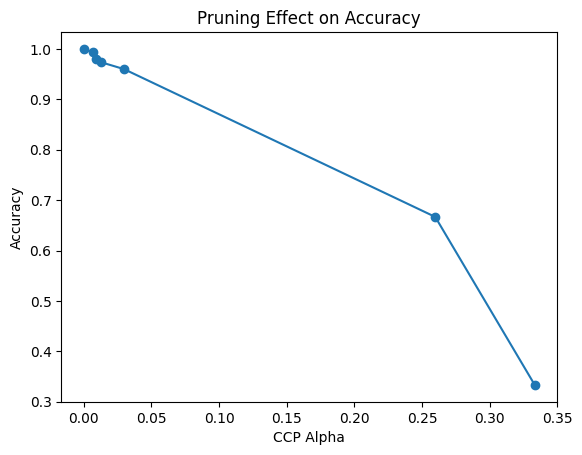

In [17]:
# 27. Write a Python program to apply Cost Complexity Pruning (CCP) and visualize its effect on accuracy.

X, y = load_iris(return_X_y=True)
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X, y)

accuracies = []
for ccp_alpha in path.ccp_alphas:
    pruned_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42).fit(X, y)
    accuracies.append(pruned_clf.score(X, y))

plt.plot(path.ccp_alphas, accuracies, marker='o')
plt.xlabel('CCP Alpha')
plt.ylabel('Accuracy')
plt.title('Pruning Effect on Accuracy')
plt.show()

In [18]:
# 28. Write a Python program to evaluate using Precision, Recall, and F1-Score.

from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test), target_names=load_iris().target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



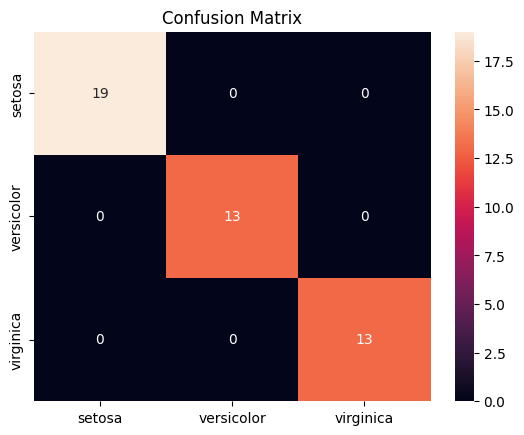

In [19]:
# 29. Write a Python program to visualize the confusion matrix using seaborn.
import seaborn as sns
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
cm = confusion_matrix(y_test, clf.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=load_iris().target_names, yticklabels=load_iris().target_names)
plt.title('Confusion Matrix')
plt.show()

In [20]:
# 30. Write a Python program to use GridSearchCV for optimal max_depth and min_samples_split.

from sklearn.model_selection import GridSearchCV, train_test_split


X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [2, 3, 5, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.4f}")

Best params: {'max_depth': 5, 'min_samples_split': 10}
Best score: 0.9429
